In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exercício 1

In [2]:
def moment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def compute_statistics(g, g_type):
    avg_deg = len(g)/g.number_of_edges()
    second_m = moment_of_degree_distribution(g, 2)
    short = nx.average_shortest_path_length(g)
    clust = nx.average_clustering(g)
    transit = nx.transitivity(g)
    assort = nx.degree_assortativity_coefficient(g)
    return [len(g), avg_deg, second_m, short, clust, transit, assort, g_type]

In [3]:
net_df = pd.DataFrame(columns=['n','Avg.Deg.','2nd.Mom.','Avg.Short.Path','Avg.Clustering',
                               'Transitivity','Assortativity','Model'])

k = 10
n = 500
p = k/(n-1)
for i in range(10):
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    net_df.loc[i] = compute_statistics(er, 'Erdos-Renyi')

n = 500
p = 0.01
k = 10
for i in range(10, 15):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(er, 'Watts-Strogatz')
    
n = 500
p = 0.1
k = 10
for i in range(15, 20):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(er, 'Watts-Strogatz')

n = 500
p = 0.1
k = 10
for i in range(20, 30):
    ba = nx.barabasi_albert_graph(n, int(k/2))
    net_df.loc[i] = compute_statistics(ba, 'Barabasi-Albert')
    
net_df

,n,Avg.Deg.,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity,Model
0,500,0.194401,114.852,2.910116,0.022529,0.023182,0.018267,Erdos-Renyi
1,500,0.202265,107.736,2.950934,0.018661,0.019500,-0.007305,Erdos-Renyi
2,500,0.200080,108.900,2.938437,0.019606,0.018563,-0.056118,Erdos-Renyi
3,500,0.197628,112.168,2.929387,0.021395,0.020696,0.040718,Erdos-Renyi
4,500,0.198491,110.636,2.929234,0.015521,0.016348,-0.012219,Erdos-Renyi
5,500,0.195236,114.336,2.918084,0.021167,0.021558,0.000144,Erdos-Renyi
6,500,0.199442,110.060,2.936361,0.019475,0.020154,0.011367,Erdos-Renyi
7,500,0.198020,111.920,2.934573,0.023463,0.022746,0.014433,Erdos-Renyi
8,500,0.202020,107.368,2.952489,0.022174,0.022161,0.001632,Erdos-Renyi
9,500,0.197394,114.096,2.924585,0.021250,0.020315,0.005161,Erdos-Renyi


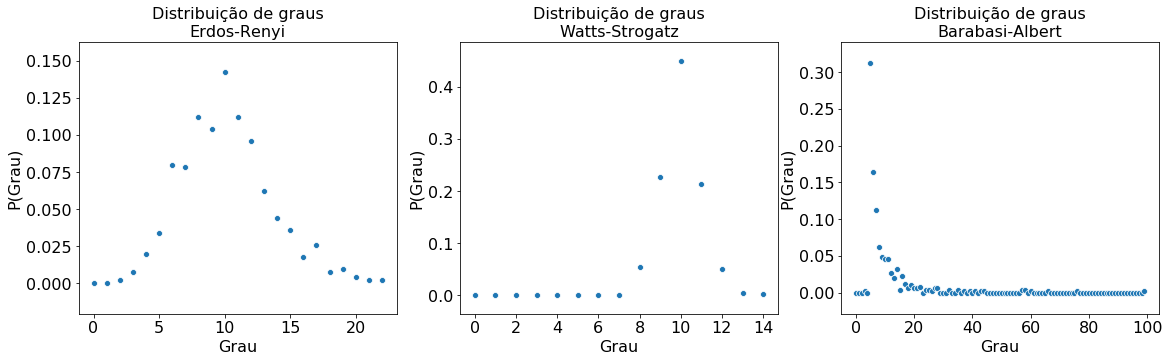

In [4]:
def set_ax_fontsize(ax, fontsize):
    ax.title.set_fontsize(fontsize)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    [tick.set_fontsize(fontsize) for tick in ax.get_xticklabels()];
    [tick.set_fontsize(fontsize) for tick in ax.get_yticklabels()];

fig, axis = plt.subplots(1,3, figsize=(8,5))

k_er, pk_er = degree_distribution(er)
plt.subplots_adjust(right=2)
axis[0].set_xlabel('Grau')
axis[0].set_ylabel('P(Grau)')
axis[0].set_title('Distribuição de graus\nErdos-Renyi')
set_ax_fontsize(axis[0], 16)
sns.scatterplot(x=k_er, y=pk_er, ax=axis[0])

k_ws, pk_ws = degree_distribution(ws)
axis[1].set_xlabel('Grau')
axis[1].set_ylabel('P(Grau)')
axis[1].set_title('Distribuição de graus\nWatts-Strogatz')
set_ax_fontsize(axis[1], 16)
sns.scatterplot(x=k_ws, y=pk_ws, ax=axis[1]);

k_ba, pk_ba = degree_distribution(ba)
axis[2].set_xlabel('Grau')
axis[2].set_ylabel('P(Grau)')
axis[2].set_title('Distribuição de graus\nBarabasi-Albert')
set_ax_fontsize(axis[2], 16)
sns.scatterplot(x=k_ba, y=pk_ba, ax=axis[2]);

Pela distribuiução do grau, temos que ER e WS não são livres de escala, já BA apresenta comportamente livre de escala. Isso é esperado, pois ER gera arestas com mesma probabilidade, independente do vértice, sem gerar hubs, por sua vez a rede WS apresenta uma variação menor do grau de um vértice, uma vez que seu processo de geração começa com uma rede regular, com possibilidade de "rewiring", poucos vértices se tornarão muito conectados, mantendo a distribuição do grtau bem próxima da média. A rede BA, ao contrário das duas anteriores, força a presença de hubs, apresentando uma distribuição livre-de-escala.

Em termos de assortatividade, ER e WS apresentam assortatividade próxima de 0, uma vez que a probabilidade de existir arestas não depende do grau do vértice, i.e., não existem prioridades de conexão, já nas redes BA é esperado que vértices altamente conectados, se conectem com vértices menos conectados, gerando disassortatividade (< 0).

## Exercício 2

In [5]:
ex2 = pd.Series()
for k in np.arange(0, 5, 0.05):
    n = 500
    p = k/(n-1)
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
    ex2.loc[k] = len(giant_comp)/n

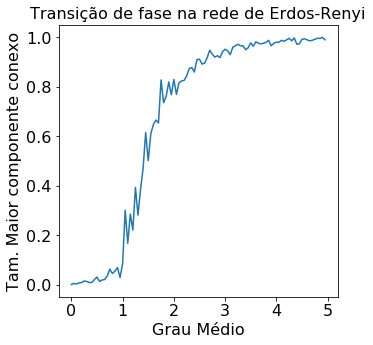

In [6]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex2.index, y=ex2, ax=axis)
axis.set_title('Transição de fase na rede de Erdos-Renyi')
axis.set_xlabel('Grau Médio')
axis.set_ylabel('Tam. Maior componente conexo')
set_ax_fontsize(axis, 16)

In [7]:
ex2 = pd.DataFrame(columns=['N','k','Avg.Short.Path', 'Real diameter', 'Predicted Diameter'])
for k in [4, 10, 20, 30]:
    for n in range(100, 500, 10):
        p = k/(n-1)
        er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
        giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
        short = nx.average_shortest_path_length(giant_comp)
        dmax = nx.diameter(giant_comp)
        avg_deg = len(giant_comp)/giant_comp.number_of_edges()
        diam = np.abs(np.log(len(giant_comp))/np.log(avg_deg))#Tem que tirar o valor absoluto aqui?
        ex2.loc[ex2.shape[0]] = [n, k, short, dmax, diam]
ex2

,N,k,Avg.Short.Path,Real diameter,Predicted Diameter
0,100.0,4.0,3.401818,7.0,6.643856
1,110.0,4.0,3.269058,7.0,5.810896
2,120.0,4.0,3.409387,7.0,6.222770
3,130.0,4.0,3.972774,8.0,8.827469
4,140.0,4.0,3.530174,7.0,6.608921
...,...,...,...,...,...
155,450.0,30.0,2.060510,3.0,2.259053
156,460.0,30.0,2.059439,3.0,2.253054
157,470.0,30.0,2.073602,3.0,2.269405
158,480.0,30.0,2.075992,3.0,2.271674


In [8]:
'''fig, axis = plt.subplots(1,4, figsize=(8,4))
plt.subplots_adjust(right=2.9)

k_4 = ex2[ex2['k']==4]
sns.scatterplot(x=k_4['N'], y=k_4['Avg.Short.Path'], ax=axis[0]);
axis[0].set_title('Tam. Médio do caminho mais curto\nk=4')

k_10 = ex2[ex2['k'] == 10]
sns.scatterplot(x=k_10['N'], y=k_10['Avg.Short.Path'], ax=axis[1]);
axis[1].set_title('Tam. Médio do caminho mais curto\nk=10')

k_20 = ex2[ex2['k'] == 20]
sns.scatterplot(x=k_20['N'], y=k_20['Avg.Short.Path'], ax=axis[2])
axis[2].set_title('Tam. Médio do caminho mais curto\nk=20')

k_30 = ex2[ex2['k'] == 30]
sns.scatterplot(x=k_30['N'], y=k_30['Avg.Short.Path'], ax=axis[3])
axis[3].set_title('Tam. Médio do caminho mais curto\nk=30')

for ax in axis:
    set_ax_fontsize(ax, 18)''';

Text(0.5, 1.0, 'Diâmetro\nk=30')

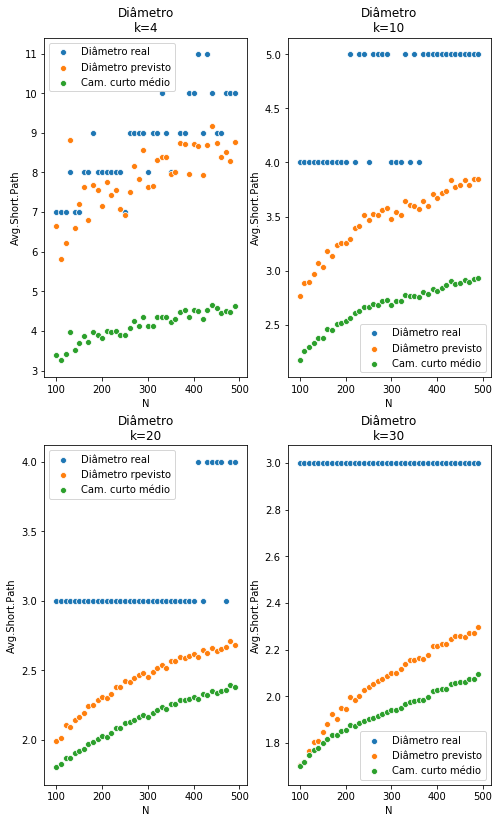

In [10]:
fig, axis = plt.subplots(2,2, figsize=(8,5))
plt.subplots_adjust(top=2.2)

k_4 = ex2[ex2['k']==4]
sns.scatterplot(x=k_4['N'], y=k_4['Real diameter'], ax=axis[0,0], label='Diâmetro real');
sns.scatterplot(x=k_4['N'], y=k_4['Predicted Diameter'], ax=axis[0,0], label='Diâmetro previsto')
sns.scatterplot(x=k_4['N'], y=k_4['Avg.Short.Path'], ax=axis[0,0], label='Cam. curto médio');

axis[0,0].set_title('Diâmetro\nk=4')

k_10 = ex2[ex2['k'] == 10]
sns.scatterplot(x=k_10['N'], y=k_10['Real diameter'], ax=axis[0,1], label='Diâmetro real');
sns.scatterplot(x=k_10['N'], y=k_10['Predicted Diameter'], ax=axis[0,1], label='Diâmetro previsto')
sns.scatterplot(x=k_10['N'], y=k_10['Avg.Short.Path'], ax=axis[0,1], label='Cam. curto médio');
axis[0,1].set_title('Diâmetro\nk=10')

k_20 = ex2[ex2['k'] == 20]
sns.scatterplot(x=k_20['N'], y=k_20['Real diameter'], ax=axis[1,0], label='Diâmetro real')
sns.scatterplot(x=k_20['N'], y=k_20['Predicted Diameter'], ax=axis[1,0], label='Diâmetro rpevisto')
sns.scatterplot(x=k_20['N'], y=k_20['Avg.Short.Path'], ax=axis[1,0], label='Cam. curto médio')
axis[1,0].set_title('Diâmetro\nk=20')

k_30 = ex2[ex2['k'] == 30]
sns.scatterplot(x=k_30['N'], y=k_30['Real diameter'], ax=axis[1,1], label='Diâmetro real')
sns.scatterplot(x=k_30['N'], y=k_30['Predicted Diameter'], ax=axis[1,1], label='Diâmetro previsto')
sns.scatterplot(x=k_30['N'], y=k_30['Avg.Short.Path'], ax=axis[1,1], label='Cam. curto médio')
axis[1,1].set_title('Diâmetro\nk=30')

As redes ER não apresentam características de Small World, o que é evidenciado nas redes de alto diâmetro onde o diâmetro real (azul) da rede se afasta do esperado nas redes small-world, i.e., $d_{max} = \frac{logN}{log<K>}$ (em laranja). Na rede com diâmetro muito baixo k=4, existe uma proximidade, mas é devido ao diâmetro ser pequeno de mais para trazer diferenças entre conexões de longa distancia e conexões próximas, é notável que conforme o diâmetro aumenta o diâmetro real se afasta do esperado em redes small world nas redes ER.

## Exercício 3

In [ ]:
ex3_ws = pd.DataFrame(columns=['p','Mean vertex-vertex distance','Clustering','Variance'])
n = 100
k = 5
for index, p in enumerate(np.arange(0, 1, 0.001)):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    mean_dist = nx.average_shortest_path_length(ws)
    clust = nx.average_clustering(ws)
    var = moment_of_degree_distribution(ws, 2)
    ex3_ws.loc[index] = [p, mean_dist, clust, var]
ex3_ws

In [ ]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
dist = ex3_ws['Mean vertex-vertex distance']
dist = dist/dist.max()
cluster = ex3_ws['Clustering']
cluster = cluster/cluster.max()
sns.lineplot(x=ex3_ws['p'], y=dist, ax=axis, label='Distância média')
graph = sns.lineplot(x=ex3_ws['p'], y=cluster, ax=axis, label='Clustering')
graph.set(xscale='log')
axis.set_title('Distância média e Clustering\nModelo de Watts-Strogatz')
axis.set_ylabel('Clustering/Dist. média')
set_ax_fontsize(axis, 16)

In [ ]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex3_ws['p'], y=ex3_ws['Variance'], ax=axis)
axis.set_title('Variância do grau em função de P\nModelo de Watts-Strogatz')
axis.set_ylabel('Variância')
set_ax_fontsize(axis, 16)

In [ ]:
fig, axis = plt.subplots(1,3, figsize=(5,5))
plt.subplots_adjust(right=1.9)

n = 100
k = 5
for index, p in enumerate([0.001, 0.01, 0.1]):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    degrees, _ = degree_distribution(ws)
    axis[index].set_title('Distribuição de graus\nModelo de Watts-Strogatzs\nP={}'.format(p))
    sns.distplot(degrees, ax=axis[index], hist=False)

In [ ]:
#Perguntar quem é <d> neste exercício
ex3_lat = pd.DataFrame(columns=['Avg.Dist.1D','Avg.Dist.2D','Avg.Dist.3D','Avg.Dist.Random Net'])
n = 1

for n in range(50,1000,50):
    dims = np.array([n])
    grid_1d = nx.generators.lattice.grid_graph(dims)    
    
    dims = [int(n**(1/2)), int(n**(1/2))]
    grid_2d = nx.generators.lattice.grid_graph(dims)
    
    dims = [int(n**(1/3)), int(n**(1/3)), int(n**(1/3))]
    grid_3d = nx.generators.lattice.grid_graph(dims)
    
    er_0001 = nx.gnp_random_graph(n=n, p=0.001, seed=None, directed=False)
    er_001 = nx.gnp_random_graph(n=n, p=0.01, seed=None, directed=False)
    er_01 = nx.gnp_random_graph(n=n, p=0.1, seed=None, directed=False)
    er_1 = nx.gnp_random_graph(n=n, p=1, seed=None, directed=False)

    giant_comp_01 = sorted(nx.connected_component_subgraphs(er_01), key = len, reverse=True)[0]
    
    
    
    dist_1d = nx.diameter(grid_1d)
    dist_2d = nx.diameter(grid_2d)
    dist_3d = nx.diameter(grid_3d)
    dist_rand = nx.diameter(giant_comp)
    #avg_1d = len(grid_1d)/grid_1d.number_of_edges()
    #avg_2d = len(grid_2d)/grid_1d.number_of_edges()
    #avg_3d = len(grid_3d)/grid_1d.number_of_edges()
    ex3_lat.loc[n] = [dist_1d, dist_2d, dist_3d, dist_rand]

ex3_lat = ex3_lat.astype('int32')
ex3_lat

In [ ]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
#ex3_lat['Avg.Dist.1D']
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.1D'], ax=axis, label='1D')
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.2D'], ax=axis, label='2D')
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.3D'], ax=axis, label='3D')
sns.lineplot(x=ex3_lat.index, y=ex3_lat['Avg.Dist.Random Net'], ax=axis, label='Random Graph (p=0.1)')
#Plotar uma curva para cada valor de P?